# Does Harry Browne's permanent portfolio withstand the test of time?

## Python Imports

In [1]:
# Standard Library
import datetime
import io
import os
import random
import sys
import warnings

from datetime import datetime, timedelta
from pathlib import Path

# Data Handling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, FuncFormatter, MultipleLocator

# Data Sources
import yfinance as yf

# Statistical Analysis
import statsmodels.api as sm

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Suppress warnings
warnings.filterwarnings("ignore")

## Add Directories To Path

In [2]:
# Add the source subdirectory to the system path to allow import config from settings.py
current_directory = Path(os.getcwd())
website_base_directory = current_directory.parent.parent.parent
src_directory = website_base_directory / "src"
sys.path.append(str(src_directory)) if str(src_directory) not in sys.path else None

# Import settings.py
from settings import config

# Add configured directories from config to path
SOURCE_DIR = config("SOURCE_DIR")
sys.path.append(str(Path(SOURCE_DIR))) if str(Path(SOURCE_DIR)) not in sys.path else None

# Add other configured directories
BASE_DIR = config("BASE_DIR")
CONTENT_DIR = config("CONTENT_DIR")
POSTS_DIR = config("POSTS_DIR")
PAGES_DIR = config("PAGES_DIR")
PUBLIC_DIR = config("PUBLIC_DIR")
SOURCE_DIR = config("SOURCE_DIR")
DATA_DIR = config("DATA_DIR")
DATA_MANUAL_DIR = config("DATA_MANUAL_DIR")

# Print system path
for i, path in enumerate(sys.path):
    print(f"{i}: {path}")

0: /usr/lib/python313.zip
1: /usr/lib/python3.13
2: /usr/lib/python3.13/lib-dynload
3: 
4: /home/jared/python-virtual-envs/general-venv-p313/lib/python3.13/site-packages
5: /home/jared/Cloud_Storage/Dropbox/Websites/jaredszajkowski.github.io_congo/src


## Track Index Dependencies

In [3]:
# Create file to track markdown dependencies
dep_file = Path("index_dep.txt")
dep_file.write_text("")

0

## Python Functions

In [4]:
from bb_clean_data import bb_clean_data
from df_info import df_info
from df_info_markdown import df_info_markdown
from export_track_md_deps import export_track_md_deps
from load_data import load_data
from pandas_set_decimal_places import pandas_set_decimal_places
from strategy_harry_brown_perm_port import strategy_harry_brown_perm_port
from summary_stats import summary_stats

## Data Overview

### Load Data

In [5]:
# Set decimal places
pandas_set_decimal_places(2)

# Bonds dataframe
bb_clean_data(
    base_directory=DATA_DIR,
    fund_ticker_name="SPBDU10T_S&P US Treasury Bond 7-10 Year Total Return Index",
    source="Bloomberg",
    asset_class="Indices",
    excel_export=True,
    pickle_export=True,
    output_confirmation=True,
)

bonds_data = load_data(
    base_directory=DATA_DIR,
    ticker="SPBDU10T_S&P US Treasury Bond 7-10 Year Total Return Index_Clean",
    source="Bloomberg",
    asset_class="Indices",
    timeframe="Daily",
    file_format="excel",
)

bonds_data['Date'] = pd.to_datetime(bonds_data['Date'])
bonds_data.set_index('Date', inplace = True)
bonds_data = bonds_data[(bonds_data.index >= '1990-01-01') & (bonds_data.index <= '2023-12-31')]
bonds_data.rename(columns={'Close':'Bonds_Close'}, inplace=True)
bonds_data['Bonds_Daily_Return'] = bonds_data['Bonds_Close'].pct_change()
bonds_data['Bonds_Total_Return'] = (1 + bonds_data['Bonds_Daily_Return']).cumprod()
display(bonds_data.head())

The first and last date of data for SPBDU10T_S&P US Treasury Bond 7-10 Year Total Return Index is: 


Close
Date            
1989-12-29   100

Close
Date             
2024-04-30 579.02

Bloomberg data cleaning complete for SPBDU10T_S&P US Treasury Bond 7-10 Year Total Return Index
--------------------


Bonds_Close  Bonds_Daily_Return  Bonds_Total_Return
Date                                                           
1990-01-02        99.97                 NaN                 NaN
1990-01-03        99.73               -0.00                1.00
1990-01-04        99.81                0.00                1.00
1990-01-05        99.77               -0.00                1.00
1990-01-08        99.68               -0.00                1.00

In [6]:
# Copy this <!-- INSERT_01_Bonds_Data_Head_HERE --> to index_temp.md
export_track_md_deps(
    dep_file=dep_file, 
    md_filename="01_Bonds_Data_Head.md", 
    content=bonds_data.head().to_markdown(floatfmt=".3f"),
    output_type="markdown",
)

✅ Exported and tracked: 01_Bonds_Data_Head.md


In [7]:
# Stocks dataframe
bb_clean_data(
    base_directory=DATA_DIR,
    fund_ticker_name="SPXT_S&P 500 Total Return Index",
    source="Bloomberg",
    asset_class="Indices",
    excel_export=True,
    pickle_export=True,
    output_confirmation=True,
)

stocks_data = load_data(
    base_directory=DATA_DIR,
    ticker="SPXT_S&P 500 Total Return Index_Clean",
    source="Bloomberg",
    asset_class="Indices",
    timeframe="Daily",
    file_format="excel",
)

stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
stocks_data.set_index('Date', inplace = True)
stocks_data = stocks_data[(stocks_data.index >= '1990-01-01') & (stocks_data.index <= '2023-12-31')]
stocks_data.rename(columns={'Close':'Stocks_Close'}, inplace=True)
stocks_data['Stocks_Daily_Return'] = stocks_data['Stocks_Close'].pct_change()
stocks_data['Stocks_Total_Return'] = (1 + stocks_data['Stocks_Daily_Return']).cumprod()
display(stocks_data.head())

The first and last date of data for SPXT_S&P 500 Total Return Index is: 


Close
Date             
1988-01-04 256.02

Close
Date               
2024-04-30 10951.66

Bloomberg data cleaning complete for SPXT_S&P 500 Total Return Index
--------------------


Stocks_Close  Stocks_Daily_Return  Stocks_Total_Return
Date                                                              
1990-01-01           NaN                  NaN                  NaN
1990-01-02        386.16                  NaN                  NaN
1990-01-03        385.17                -0.00                 1.00
1990-01-04        382.02                -0.01                 0.99
1990-01-05        378.30                -0.01                 0.98

In [8]:
# Copy this <!-- INSERT_01_Stocks_Data_Head_HERE --> to index_temp.md
export_track_md_deps(
    dep_file=dep_file, 
    md_filename="01_Stocks_Data_Head.md", 
    content=stocks_data.head().to_markdown(floatfmt=".3f"),
    output_type="markdown",
)

✅ Exported and tracked: 01_Stocks_Data_Head.md


In [9]:
# Gold dataframe
bb_clean_data(
    base_directory=DATA_DIR,
    fund_ticker_name="XAU_Gold USD Spot",
    source="Bloomberg",
    asset_class="Commodities",
    excel_export=True,
    pickle_export=True,
    output_confirmation=True,
)

gold_data = load_data(
    base_directory=DATA_DIR,
    ticker="XAU_Gold USD Spot_Clean",
    source="Bloomberg",
    asset_class="Commodities",
    timeframe="Daily",
    file_format="excel",
)

gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace = True)
gold_data = gold_data[(gold_data.index >= '1990-01-01') & (gold_data.index <= '2023-12-31')]
gold_data.rename(columns={'Close':'Gold_Close'}, inplace=True)
gold_data['Gold_Daily_Return'] = gold_data['Gold_Close'].pct_change()
gold_data['Gold_Total_Return'] = (1 + gold_data['Gold_Daily_Return']).cumprod()
display(gold_data.head())

The first and last date of data for XAU_Gold USD Spot is: 


Close
Date            
1949-12-30 34.69

Close
Date              
2024-05-01 2299.31

Bloomberg data cleaning complete for XAU_Gold USD Spot
--------------------


Gold_Close  Gold_Daily_Return  Gold_Total_Return
Date                                                        
1990-01-02      399.00                NaN                NaN
1990-01-03      395.00              -0.01               0.99
1990-01-04      396.50               0.00               0.99
1990-01-05      405.00               0.02               1.02
1990-01-08      404.60              -0.00               1.01

In [10]:
# Copy this <!-- INSERT_01_Gold_Data_Head_HERE --> to index_temp.md
export_track_md_deps(
    dep_file=dep_file, 
    md_filename="01_Gold_Data_Head.md", 
    content=gold_data.head().to_markdown(floatfmt=".3f"),
    output_type="markdown",
)

✅ Exported and tracked: 01_Gold_Data_Head.md


### Combine Data

In [11]:
# Merge the stock data and bond data into a single DataFrame using their indices (dates)
perm_port = pd.merge(stocks_data['Stocks_Close'], bonds_data['Bonds_Close'], left_index=True, right_index=True)

# Add gold data to the portfolio DataFrame by merging it with the existing data on indices (dates)
perm_port = pd.merge(perm_port, gold_data['Gold_Close'], left_index=True, right_index=True)

# Add a column for cash with a constant value of 1 (assumes the value of cash remains constant at $1 over time)
perm_port['Cash_Close'] = 1

# Remove any rows with missing values (NaN) to ensure clean data for further analysis
perm_port.dropna(inplace=True)

# Display the finalized portfolio DataFrame
display(perm_port)

Stocks_Close  Bonds_Close  Gold_Close  Cash_Close
Date                                                         
1990-01-02        386.16        99.97      399.00           1
1990-01-03        385.17        99.73      395.00           1
1990-01-04        382.02        99.81      396.50           1
1990-01-05        378.30        99.77      405.00           1
1990-01-08        380.04        99.68      404.60           1
...                  ...          ...         ...         ...
2023-12-22      10292.37       604.17     2053.08           1
2023-12-26      10335.98       604.55     2067.81           1
2023-12-27      10351.60       609.36     2077.49           1
2023-12-28      10356.59       606.83     2065.61           1
2023-12-29      10327.83       606.18     2062.98           1

[8479 rows x 4 columns]

### Check For Missing Values

In [12]:
# Check for any missing values in each column
perm_port.isnull().any()

Stocks_Close    False
Bonds_Close     False
Gold_Close      False
Cash_Close      False
dtype: bool

### Permanent Portfolio DataFrame Info

In [13]:
df_info(perm_port)

The columns, shape, and data types are:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8479 entries, 1990-01-02 to 2023-12-29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stocks_Close  8479 non-null   float64
 1   Bonds_Close   8479 non-null   float64
 2   Gold_Close    8479 non-null   float64
 3   Cash_Close    8479 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 331.2 KB
None
The first 5 rows are:


Stocks_Close  Bonds_Close  Gold_Close  Cash_Close
Date                                                         
1990-01-02        386.16        99.97      399.00           1
1990-01-03        385.17        99.73      395.00           1
1990-01-04        382.02        99.81      396.50           1
1990-01-05        378.30        99.77      405.00           1
1990-01-08        380.04        99.68      404.60           1

The last 5 rows are:


Stocks_Close  Bonds_Close  Gold_Close  Cash_Close
Date                                                         
2023-12-22      10292.37       604.17     2053.08           1
2023-12-26      10335.98       604.55     2067.81           1
2023-12-27      10351.60       609.36     2077.49           1
2023-12-28      10356.59       606.83     2065.61           1
2023-12-29      10327.83       606.18     2062.98           1

In [14]:
# Copy this <!-- INSERT_02_Perm_Port_DF_Info_HERE --> to index_temp.md
export_track_md_deps(
    dep_file=dep_file, 
    md_filename="02_Perm_Port_DF_Info.md", 
    content=df_info_markdown(perm_port),
    output_type="markdown",
)

✅ Exported and tracked: 02_Perm_Port_DF_Info.md


## Execute Strategy

In [15]:
# List of funds to be used
fund_list = ['Stocks', 'Bonds', 'Gold', 'Cash']

# Starting cash contribution
starting_cash = 10000

# Monthly cash contribution
cash_contrib = 0

strat = strategy_harry_brown_perm_port(
    fund_list=fund_list, 
    starting_cash=starting_cash, 
    cash_contrib=cash_contrib, 
    close_prices_df=perm_port, 
    rebal_month=1, 
    rebal_day=1, 
    rebal_per_high=0.35, 
    rebal_per_low=0.15,
    excel_export=True,
    pickle_export=True,
    output_confirmation=True,
)

strat = strat.set_index('Date')

Strategy complete for Stocks_Bonds_Gold_Cash


In [16]:
df_info(strat)

The columns, shape, and data types are:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8479 entries, 1990-01-02 to 2023-12-29
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stocks_Close          8479 non-null   float64
 1   Bonds_Close           8479 non-null   float64
 2   Gold_Close            8479 non-null   float64
 3   Cash_Close            8479 non-null   int64  
 4   Stocks_BA_Shares      8479 non-null   float64
 5   Stocks_BA_$_Invested  8479 non-null   float64
 6   Stocks_BA_Port_%      8479 non-null   float64
 7   Bonds_BA_Shares       8479 non-null   float64
 8   Bonds_BA_$_Invested   8479 non-null   float64
 9   Bonds_BA_Port_%       8479 non-null   float64
 10  Gold_BA_Shares        8479 non-null   float64
 11  Gold_BA_$_Invested    8479 non-null   float64
 12  Gold_BA_Port_%        8479 non-null   float64
 13  Cash_BA_Shares        8479 non-null   float64
 14  Cash_BA_$_Inve

Stocks_Close  Bonds_Close  Gold_Close  Cash_Close  \
Date                                                            
1990-01-02        386.16        99.97      399.00           1   
1990-01-03        385.17        99.73      395.00           1   
1990-01-04        382.02        99.81      396.50           1   
1990-01-05        378.30        99.77      405.00           1   
1990-01-08        380.04        99.68      404.60           1   

            Stocks_BA_Shares  Stocks_BA_$_Invested  Stocks_BA_Port_%  \
Date                                                                   
1990-01-02              6.47               2500.00              0.25   
1990-01-03              6.47               2493.59              0.25   
1990-01-04              6.47               2473.20              0.25   
1990-01-05              6.47               2449.11              0.25   
1990-01-08              6.47               2460.38              0.25   

            Bonds_BA_Shares  Bonds_BA_$_Invested  Bonds_BA_Port_%  ...  \
Date                                                               ...   
1990-01-02            25.01              2500.00             0.25  ...   
1990-01-03            25.01              2494.02             0.25  ...   
1990-01-04            25.01              2496.02             0.25  ...   
1990-01-05            25.01              2494.92             0.25  ...   
1990-01-08            25.01              2492.72             0.25  ...   

            Bonds_AA_Port_%  Gold_AA_Shares  Gold_AA_$_Invested  \
Date                                                              
1990-01-02             0.25            6.27             2500.00   
1990-01-03             0.25            6.27             2474.94   
1990-01-04             0.25            6.27             2484.34   
1990-01-05             0.25            6.27             2537.59   
1990-01-08             0.25            6.27             2535.09   

            Gold_AA_Port_%  Cash_AA_Shares  Cash_AA_$_Invested  \
Date                                                             
1990-01-02            0.25         2500.00             2500.00   
1990-01-03            0.25         2500.00             2500.00   
1990-01-04            0.25         2500.00             2500.00   
1990-01-05            0.25         2500.00             2500.00   
1990-01-08            0.25         2500.00             2500.00   

            Cash_AA_Port_%  Total_AA_$_Invested Return  Cumulative_Return  
Date                                                                       
1990-01-02            0.25             10000.00    NaN                NaN  
1990-01-03            0.25              9962.55  -0.00               1.00  
1990-01-04            0.25              9953.56  -0.00               1.00  
1990-01-05            0.25              9981.63   0.00               1.00  
1990-01-08            0.25              9988.19   0.00               1.00  

[5 rows x 34 columns]

The last 5 rows are:


Stocks_Close  Bonds_Close  Gold_Close  Cash_Close  \
Date                                                            
2023-12-22      10292.37       604.17     2053.08           1   
2023-12-26      10335.98       604.55     2067.81           1   
2023-12-27      10351.60       609.36     2077.49           1   
2023-12-28      10356.59       606.83     2065.61           1   
2023-12-29      10327.83       606.18     2062.98           1   

            Stocks_BA_Shares  Stocks_BA_$_Invested  Stocks_BA_Port_%  \
Date                                                                   
2023-12-22              1.81              18595.87              0.29   
2023-12-26              1.81              18674.66              0.29   
2023-12-27              1.81              18702.89              0.29   
2023-12-28              1.81              18711.90              0.29   
2023-12-29              1.81              18659.94              0.29   

            Bonds_BA_Shares  Bonds_BA_$_Invested  Bonds_BA_Port_%  ...  \
Date                                                               ...   
2023-12-22            25.03             15124.46             0.23  ...   
2023-12-26            25.03             15134.20             0.23  ...   
2023-12-27            25.03             15254.36             0.23  ...   
2023-12-28            25.03             15191.10             0.23  ...   
2023-12-29            25.03             15175.01             0.23  ...   

            Bonds_AA_Port_%  Gold_AA_Shares  Gold_AA_$_Invested  \
Date                                                              
2023-12-22             0.23            8.00            16426.12   
2023-12-26             0.23            8.00            16543.97   
2023-12-27             0.23            8.00            16621.42   
2023-12-28             0.23            8.00            16526.37   
2023-12-29             0.23            8.00            16505.33   

            Gold_AA_Port_%  Cash_AA_Shares  Cash_AA_$_Invested  \
Date                                                             
2023-12-22            0.25        14717.17            14717.17   
2023-12-26            0.25        14717.17            14717.17   
2023-12-27            0.25        14717.17            14717.17   
2023-12-28            0.25        14717.17            14717.17   
2023-12-29            0.25        14717.17            14717.17   

            Cash_AA_Port_%  Total_AA_$_Invested Return  Cumulative_Return  
Date                                                                       
2023-12-22            0.23             64863.62   0.00               6.49  
2023-12-26            0.23             65070.01   0.00               6.51  
2023-12-27            0.23             65295.84   0.00               6.53  
2023-12-28            0.23             65146.54  -0.00               6.51  
2023-12-29            0.23             65057.44  -0.00               6.51  

[5 rows x 34 columns]

In [17]:
# Copy this <!-- INSERT_03_Strategy_HERE --> to index_temp.md
export_track_md_deps(
    dep_file=dep_file, 
    md_filename="03_Strategy.md", 
    content=df_info_markdown(strat),
    output_type="markdown",
)

✅ Exported and tracked: 03_Strategy.md


## Summary Statistics

In [18]:
sum_stats = summary_stats(
    fund_list=fund_list,
    df=strat[['Return']],
    period="Daily",
    use_calendar_days=False,
    excel_export=True,
    pickle_export=True,
    output_confirmation=True,
)

strat_pre_1999 = strat[strat.index < '2000-01-01']
sum_stats_pre_1999 = summary_stats(
    fund_list=fund_list, 
    df=strat_pre_1999[['Return']], 
    period="Daily",
    use_calendar_days=False,
    excel_export=False,
    pickle_export=False,
    output_confirmation=True,
)

strat_post_1999 = strat[strat.index >= '2000-01-01']
sum_stats_post_1999 = summary_stats(
    fund_list=fund_list, 
    df=strat_post_1999[['Return']], 
    period="Daily",
    use_calendar_days=False,
    excel_export=False,
    pickle_export=False,
    output_confirmation=True,
)

strat_post_2009 = strat[strat.index >= '2010-01-01']
sum_stats_post_2009 = summary_stats(
    fund_list=fund_list, 
    df=strat_post_2009[['Return']], 
    period="Daily",
    use_calendar_days=False,
    excel_export=False,
    pickle_export=False,
    output_confirmation=True,
)

Summary stats complete for Stocks_Bonds_Gold_Cash
Summary stats complete for Stocks_Bonds_Gold_Cash
Summary stats complete for Stocks_Bonds_Gold_Cash
Summary stats complete for Stocks_Bonds_Gold_Cash


In [19]:
all_sum_stats = pd.concat([sum_stats])
all_sum_stats = all_sum_stats.rename(index={'Return': '1990 - 2023'})
all_sum_stats = pd.concat([all_sum_stats, sum_stats_pre_1999])
all_sum_stats = all_sum_stats.rename(index={'Return': 'Pre 1999'})
all_sum_stats = pd.concat([all_sum_stats, sum_stats_post_1999])
all_sum_stats = all_sum_stats.rename(index={'Return': 'Post 1999'})
all_sum_stats = pd.concat([all_sum_stats, sum_stats_post_2009])
all_sum_stats = all_sum_stats.rename(index={'Return': 'Post 2009'})
display(all_sum_stats)

Annualized Mean  Annualized Volatility  Annualized Sharpe Ratio  \
1990 - 2023             0.06                   0.06                     0.96   
Pre 1999                0.06                   0.05                     1.21   
Post 1999               0.06                   0.06                     0.88   
Post 2009               0.06                   0.06                     0.93   

             CAGR  Daily Max Return Daily Max Return (Date)  Daily Min Return  \
1990 - 2023  0.06              0.03              2020-03-24             -0.03   
Pre 1999     0.06              0.02              1999-09-28             -0.02   
Post 1999    0.06              0.03              2020-03-24             -0.03   
Post 2009    0.06              0.03              2020-03-24             -0.03   

            Daily Min Return (Date)  Max Drawdown       Peak     Trough  \
1990 - 2023              2020-03-12         -0.15 2008-03-18 2008-11-12   
Pre 1999                 1993-08-05         -0.06 1998-07-20 1998-08-31   
Post 1999                2020-03-12         -0.15 2008-03-18 2008-11-12   
Post 2009                2020-03-12         -0.13 2021-12-27 2022-10-20   

            Recovery Date  Days to Recover  MAR Ratio  
1990 - 2023    2009-10-06              328       0.37  
Pre 1999       1998-11-05               66       0.98  
Post 1999      2009-10-06              328       0.36  
Post 2009      2023-12-01              407       0.44

In [20]:
# Copy this <!-- INSERT_04_Summary_Stats_HERE --> to index_temp.md
export_track_md_deps(
    dep_file=dep_file, 
    md_filename="04_Summary_Stats.md", 
    content=all_sum_stats.to_markdown(floatfmt=".3f"),
    output_type="markdown",
)

✅ Exported and tracked: 04_Summary_Stats.md


## Annual Returns

In [21]:
# Create dataframe for the annual returns
strat_annual_returns = strat['Cumulative_Return'].resample('Y').last().pct_change().dropna()
strat_annual_returns_df = strat_annual_returns.to_frame()
strat_annual_returns_df['Year'] = strat_annual_returns_df.index.year  # Add a 'Year' column with just the year
strat_annual_returns_df.reset_index(drop=True, inplace=True)  # Reset the index to remove the datetime index

# Now the DataFrame will have 'Year' and 'Cumulative_Return' columns
strat_annual_returns_df = strat_annual_returns_df[['Year', 'Cumulative_Return']]  # Keep only 'Year' and 'Cumulative_Return' columns
strat_annual_returns_df.rename(columns = {'Cumulative_Return':'Return'}, inplace=True)
strat_annual_returns_df.set_index('Year', inplace=True)
display(strat_annual_returns_df)

Return
Year        
1991    0.10
1992    0.03
1993    0.10
1994   -0.02
1995    0.15
1996    0.05
1997    0.06
1998    0.10
1999    0.04
2000    0.00
2001   -0.01
2002    0.04
2003    0.12
2004    0.05
2005    0.06
2006    0.10
2007    0.12
2008   -0.03
2009    0.11
2010    0.14
2011    0.07
2012    0.07
2013   -0.01
2014    0.05
2015   -0.02
2016    0.05
2017    0.09
2018   -0.01
2019    0.15
2020    0.13
2021    0.06
2022   -0.08
2023    0.11

In [22]:
# Copy this <!-- INSERT_05_Annual_Returns_HERE --> to index_temp.md
export_track_md_deps(
    dep_file=dep_file, 
    md_filename="05_Annual_Returns.md", 
    content=strat_annual_returns_df.to_markdown(floatfmt=".3f"),
    output_type="markdown",
)

✅ Exported and tracked: 05_Annual_Returns.md


In [23]:
# Export the annual returns DataFrame to Excel and pickle files
plan_name = '_'.join(fund_list)
strat_annual_returns_df.to_excel(f"{plan_name}_Annual_Returns.xlsx", sheet_name="data")
strat_annual_returns_df.to_pickle(f"{plan_name}_Annual_Returns.pkl")

## Plots

### Plot Cumulative Return

In [24]:
def plot_cumulative_return(strat_df):
    # Generate plot
    plt.figure(figsize=(10, 5), facecolor = '#F5F5F5')

    # Plotting data
    plt.plot(strat_df.index, strat_df['Cumulative_Return'], label = 'Strategy Cumulative Return', linestyle='-', color='green', linewidth=1)
    
    # Set X axis
    # x_tick_spacing = 5  # Specify the interval for x-axis ticks
    # plt.gca().xaxis.set_major_locator(MultipleLocator(x_tick_spacing))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xlabel('Year', fontsize = 9)
    plt.xticks(rotation = 45, fontsize = 7)
    # plt.xlim(, )

    # Set Y axis
    y_tick_spacing = 0.5  # Specify the interval for y-axis ticks
    plt.gca().yaxis.set_major_locator(MultipleLocator(y_tick_spacing))
    plt.ylabel('Cumulative Return', fontsize = 9)
    plt.yticks(fontsize = 7)
    # plt.ylim(0, 7.5)

    # Set title, etc.
    plt.title('Cumulative Return', fontsize = 12)
    
    # Set the grid & legend
    plt.tight_layout()
    plt.grid(True)
    plt.legend(fontsize=8)

    # Save the figure
    plt.savefig('06_Cumulative_Return.png', dpi=300, bbox_inches='tight')

    # Display the plot
    return plt.show()

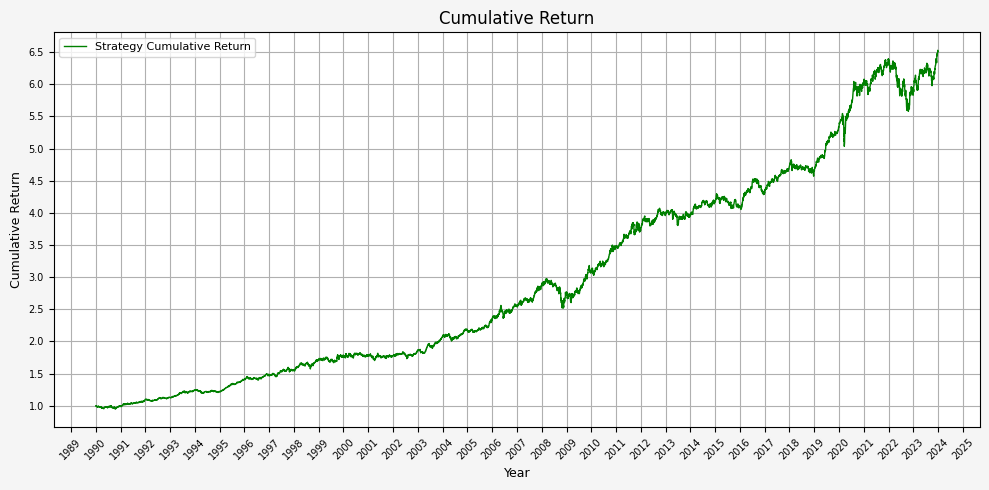

In [25]:
plot_cumulative_return(strat)

### Plot Portfolio & Component Values

In [26]:
def plot_values(strat_df):   
    # Generate plot   
    plt.figure(figsize=(10, 5), facecolor = '#F5F5F5')
    
    # Plotting data
    plt.plot(strat_df.index, strat_df['Total_AA_$_Invested'], label='Total Portfolio Value', linestyle='-', color='black', linewidth=1)
    plt.plot(strat_df.index, strat_df['Stocks_AA_$_Invested'], label='Stocks Position Value', linestyle='-', color='orange', linewidth=1)
    plt.plot(strat_df.index, strat_df['Bonds_AA_$_Invested'], label='Bond Position Value', linestyle='-', color='yellow', linewidth=1)
    plt.plot(strat_df.index, strat_df['Gold_AA_$_Invested'], label='Gold Position Value', linestyle='-', color='blue', linewidth=1)
    plt.plot(strat_df.index, strat_df['Cash_AA_$_Invested'], label='Cash Position Value', linestyle='-', color='brown', linewidth=1)

    # Set X axis
    # x_tick_spacing = 5  # Specify the interval for x-axis ticks
    # plt.gca().xaxis.set_major_locator(MultipleLocator(x_tick_spacing))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xlabel('Year', fontsize = 9)
    plt.xticks(rotation = 45, fontsize = 7)
    # plt.xlim(, )

    # Set Y axis
    y_tick_spacing = 5000  # Specify the interval for y-axis ticks
    plt.gca().yaxis.set_major_locator(MultipleLocator(y_tick_spacing))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) # Adding commas to y-axis labels
    plt.ylabel('Total Value ($)', fontsize = 9)
    plt.yticks(fontsize = 7)
    # plt.ylim(0, 75000)

    # Set title, etc.
    plt.title('Total Values For Stocks, Bonds, Gold, and Cash Positions and Portfolio', fontsize = 12)
    
    # Set the grid & legend
    plt.tight_layout()
    plt.grid(True)
    plt.legend(fontsize=8)

    # Save the figure
    plt.savefig('07_Portfolio_Values.png', dpi=300, bbox_inches='tight')

    # Display the plot
    return plt.show()

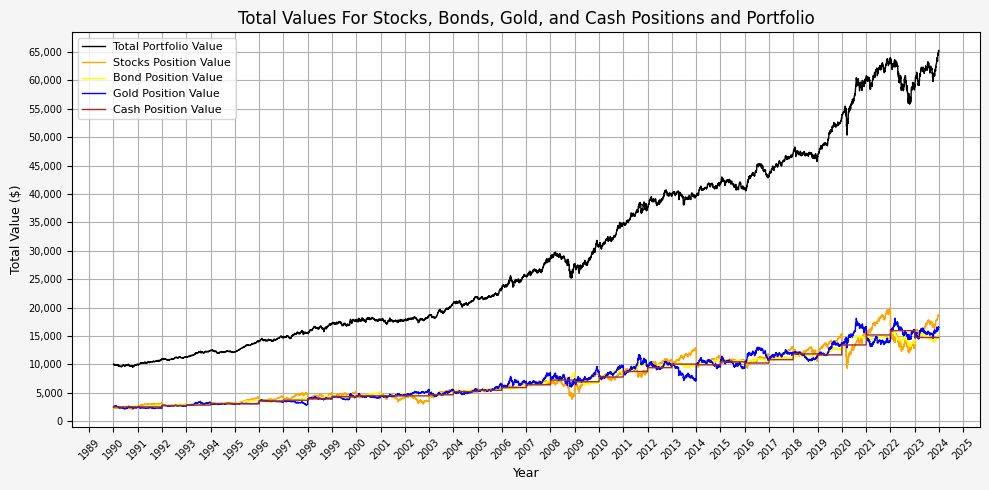

In [27]:
plot_values(strat)

### Plot Portfolio Drawdown

In [28]:
def plot_drawdown(strat_df):
    rolling_max = strat_df['Total_AA_$_Invested'].cummax()
    drawdown = (strat_df['Total_AA_$_Invested'] - rolling_max) / rolling_max * 100

    # Generate plot   
    plt.figure(figsize=(10, 5), facecolor = '#F5F5F5')

    # Plotting data
    plt.plot(strat_df.index, drawdown, label='Drawdown', linestyle='-', color='red', linewidth=1)
    
    # Set X axis
    # x_tick_spacing = 5  # Specify the interval for x-axis ticks
    # plt.gca().xaxis.set_major_locator(MultipleLocator(x_tick_spacing))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xlabel('Year', fontsize = 9)
    plt.xticks(rotation = 45, fontsize = 7)
    # plt.xlim(, )

    # Set Y axis
    y_tick_spacing = 1  # Specify the interval for y-axis ticks
    plt.gca().yaxis.set_major_locator(MultipleLocator(y_tick_spacing))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) # Adding commas to y-axis labels
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.0f}'.format(x))) # Adding 0 decimal places to y-axis labels
    plt.ylabel('Drawdown (%)', fontsize = 9)
    plt.yticks(fontsize = 7)
    # plt.ylim(-20, 0)

    # Set title, etc.
    plt.title('Portfolio Drawdown', fontsize = 12)
    
    # Set the grid & legend
    plt.tight_layout()
    plt.grid(True)
    plt.legend(fontsize=8)

    # Save the figure
    plt.savefig('08_Portfolio_Drawdown.png', dpi=300, bbox_inches='tight')

    # Display the plot
    return plt.show()

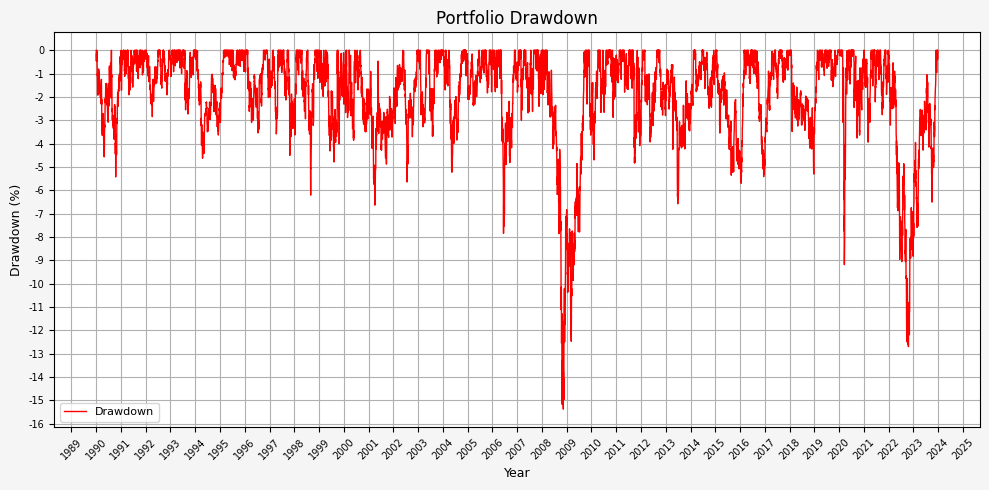

In [29]:
plot_drawdown(strat)

### Plot Asset Weights

In [30]:
def plot_asset_weights(strat_df):
    # Generate plot   
    plt.figure(figsize=(10, 5), facecolor = '#F5F5F5')
    
    # Plotting data
    plt.plot(strat_df.index, strat_df['Stocks_AA_Port_%'] * 100, label='Stocks Portfolio Weight', linestyle='-', color='orange', linewidth=1)
    plt.plot(strat_df.index, strat_df['Bonds_AA_Port_%'] * 100, label='Bonds Portfolio Weight', linestyle='-', color='yellow', linewidth=1)
    plt.plot(strat_df.index, strat_df['Gold_AA_Port_%'] * 100, label='Gold Portfolio Weight', linestyle='-', color='blue', linewidth=1)
    plt.plot(strat_df.index, strat_df['Cash_AA_Port_%'] * 100, label='Cash Portfolio Weight', linestyle='-', color='brown', linewidth=1)

    # Set X axis
    # x_tick_spacing = 5  # Specify the interval for x-axis ticks
    # plt.gca().xaxis.set_major_locator(MultipleLocator(x_tick_spacing))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xlabel('Year', fontsize = 9)
    plt.xticks(rotation = 45, fontsize = 7)
    # plt.xlim(, )

    # Set Y axis
    y_tick_spacing = 1  # Specify the interval for y-axis ticks
    plt.gca().yaxis.set_major_locator(MultipleLocator(y_tick_spacing))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) # Adding commas to y-axis labels
    plt.ylabel('Asset Weight (%)', fontsize = 9)
    plt.yticks(fontsize = 7)
    # plt.ylim(14, 36)

    # Set title, etc.
    plt.title('Portfolio Asset Weights For Stocks, Bonds, Gold, and Cash Positions', fontsize = 12)
    
    # Set the grid & legend
    plt.tight_layout()
    plt.grid(True)
    plt.legend(fontsize=8)

    # Save the figure
    plt.savefig('09_Portfolio_Weights.png', dpi=300, bbox_inches='tight')

    # Display the plot
    return plt.show()

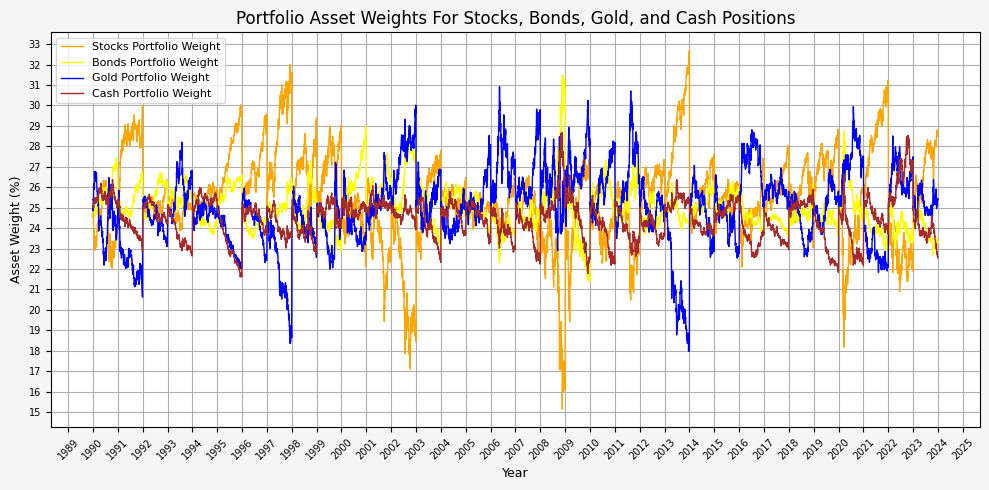

In [31]:
plot_asset_weights(strat)


### Plot Annual Returns

In [32]:
def plot_annual_returns(return_df):
    # Generate plot   
    plt.figure(figsize=(10, 5), facecolor = '#F5F5F5')
    
    # Plotting data
    plt.bar(return_df.index, return_df['Return'] * 100, label='Annual Returns', width=0.5)  # width adjusted for better spacing

    # Set X axis
    x_tick_spacing = 1  # Specify the interval for x-axis ticks
    plt.gca().xaxis.set_major_locator(MultipleLocator(x_tick_spacing))
    # plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xlabel('Year', fontsize = 9)
    plt.xticks(rotation = 45, fontsize = 7)
    # plt.xlim(, )

    # Set Y axis
    y_tick_spacing = 1  # Specify the interval for y-axis ticks
    plt.gca().yaxis.set_major_locator(MultipleLocator(y_tick_spacing))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) # Adding commas to y-axis labels
    plt.ylabel('Annual Return (%)', fontsize = 9)
    plt.yticks(fontsize = 7)
    # plt.ylim(-20, 20)

    # Set title, etc.
    plt.title('Portfolio Annual Returns', fontsize = 12)
    
    # Set the grid & legend
    plt.tight_layout()
    plt.grid(True)
    plt.legend(fontsize=8)

    # Save the figure
    plt.savefig('10_Portfolio_Annual_Returns.png', dpi=300, bbox_inches='tight')

    # Display the plot
    return plt.show()

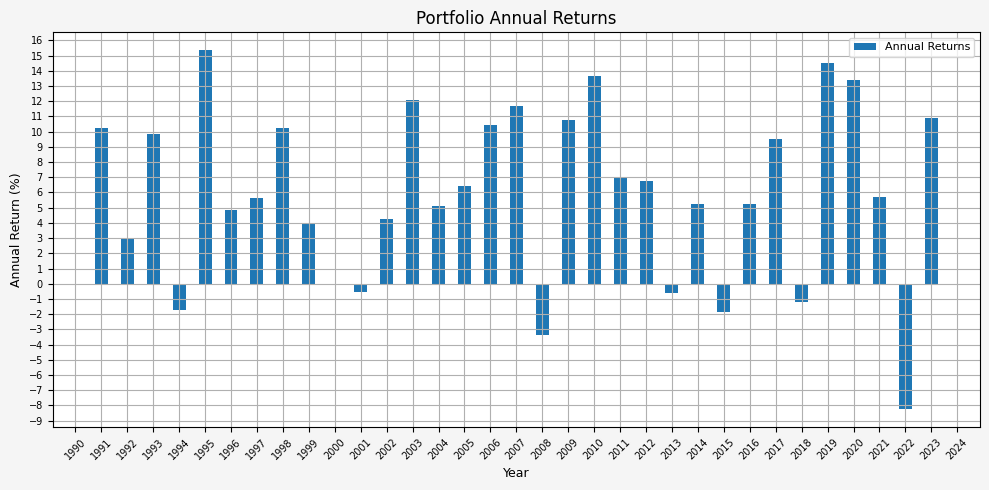

In [33]:
plot_annual_returns(strat_annual_returns_df)

## Portfolio Summary Statistics For Various Rebalance Dates

In [34]:
# # Set ranges for months and days
# months = list(range(1, 13))
# days = list(range(1, 32))

# # Create an empty DataFrame to store the results
# stats = pd.DataFrame(columns = ['Rebal_Month', 'Rebal_Day', 'Annualized Mean', 'Annualized Volatility', 'Annualized Sharpe Ratio', 'CAGR', 
#                                 'Daily Max Return', 'Daily Max Return (Date)', 'Daily Min Return', 'Daily Min Return (Date)', 'Max Drawdown', 
#                                 'Peak', 'Bottom', 'Recovery Date',])

# # Loop through each combination of month and day
# for month in months:
#     for day in days:
#         try:
#             strat = strategy_harry_brown_perm_port(
#                 fund_list=fund_list, 
#                 starting_cash=starting_cash, 
#                 cash_contrib=cash_contrib, 
#                 close_prices_df=perm_port, 
#                 rebal_month=month, 
#                 rebal_day=day, 
#                 rebal_per_high=0.35, 
#                 rebal_per_low=0.15,
#                 excel_export=False,
#                 pickle_export=False,
#                 output_confirmation=False,
#             ).set_index('Date')
            
#             sum_stats = summary_stats(
#                 fund_list=fund_list,
#                 df=strat[['Return']],
#                 period="Daily",
#                 excel_export=False,
#                 pickle_export=False,
#                 output_confirmation=False,
#             )

#             stats = pd.concat([stats, sum_stats], ignore_index=True)
#             stats.loc[stats.index[-1], 'Rebal_Month'] = month
#             stats.loc[stats.index[-1], 'Rebal_Day'] = day
#             print(f"Month: {month}, Day: {day} - Stats added successfully.")
            
#         except Exception as e:
#             print(f"Error for month {month} and day {day}: {e}")
#             continue

In [35]:
# # Export the stats DataFrame to Excel and pickle files
# plan_name = '_'.join(fund_list)
# stats.to_excel(f"{plan_name}_Various_Rebalance_Summary_Stats.xlsx", sheet_name="data")
# stats.to_pickle(f"{plan_name}_Various_Rebalance_Summary_Stats.pkl")

In [36]:
# Load the stats DataFrame from the pickle file
# stats = load_data(f"{plan_name}_Various_Rebalance_Summary_Stats.pkl")

In [37]:
# stats